In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from aux_functions import kl_div, df_softmax


In [2]:
eta = pd.read_csv("data/eta.csv")
info = pd.read_csv("data/env_info.csv")
birds_num = info['num_of_birds'].item()
evaders_num = birds_num - 1
state_card = info['state_space_dim'].item()
eta.head()


,eta_0,eta_1,eta_2,eta_3,eta_4,eta_5,eta_6,eta_7,eta_8,eta_9,eta_10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
p_a = pd.DataFrame(columns=['left','straight','right'])

for i in range(info['num_of_birds'].item()):
    df_policy = pd.read_csv("data/value_policy"+str(i)+".csv")
    policy_0 = df_policy[-state_card:][['left','straight','right']]
    p_a_s = df_softmax(policy_0)
    p_a_s.reset_index(drop=True, inplace=True)
    p = p_a_s.mul(eta['eta_'+str(i)], axis=0)
    p = p.sum(axis=0)
    p_a.loc[len(p_a.index)] = p

#We take only from bird 1 onwards (evaders)
p_a = p_a[1:].reset_index(drop=True)

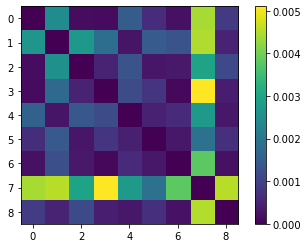

In [19]:
X = [i for i in range(0,evaders_num)]
Y = [i for i in range(0,evaders_num)]
Z = np.empty((evaders_num,evaders_num))

for x in X:
    for y in Y:
        Z[x,y] = kl_div(x,y,p_a)

plt.imshow(Z)
plt.colorbar()